# 22. Riemannian and pseudo-Riemannian manifolds

This notebook is part of the [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

Let $M$ be a smooth manifold and $g$ a covariant tensor field of rank two: $g\in T^{(0,2)}M.$ We call $g$ **symmetric** if
$$g_p(X_p,Y_p)=g_p(Y_p,X_p)\quad \text{for } X_p,Y_p\in T_pM,\ p\in M.$$

We call $g$ **positive definite** if 
$$g_p(X_p,X_p)\geq 0\quad \text{for all}\  X_p\in T_pM,\ p\in M$$ and 
$$g_p(X_p,X_p)=0\quad \text{implies } X_p=0_p\in T_pM.
$$

The tensor field $g$ is **non-singular** if for all $p\in M$

$$g_p(X_p,Y_p)=0\quad \text{for all } Y_p\in T_pM\quad \text{implies } X_p=0_p\in T_pM.
$$

Note that the positive-definitness implies the non-singularity:<br>
if $g_p(X_p,Y_p)=0\quad \text{for all }  Y_p\in T_pM,\ $ then 
$\ g_p(X_p,X_p)=0\ $ and consequently $X_p=0_p$.

A **pseudo-Riemannian manifold** is a smooth manifold $M$ with a non-singular, symmetric, smooth tensor field $g\in T^{(0,2)}M$, called **metric** of $M$.

If the metric is positive definite we use the name **Riemannian manifold**.

<br>

**Example 22.1**

Metric method in SageMath Manifold:

In [2]:
                       # Riemannian manifold M
M = Manifold(2, 'M', structure='Riemannian');M

2-dimensional Riemannian manifold M

In [3]:
g = M.metric();g       # metric on M

Riemannian metric g on the 2-dimensional Riemannian manifold M

<br>

In a Riemannian manifold, $M$, with a metric $g$, the bilinear form $g_p(\cdot,\cdot)$ is an **inner product on** $T_pM$. The **norm or length** of a tangent vector $X_p ∈ T_p M$ is defined by 

\begin{equation}
\|X_p\| = \sqrt{g_p (X_p , X_p )},
\tag{22.1}
\end{equation}

and the **length of a curve** $\gamma : [a, b] → M$ is defined by

\begin{equation}
L_\gamma=\int_a^b\|\gamma'_t\|dt.
\tag{22.2}
\end{equation}

If $M$ is a Riemannian manifold and $(x^1,\ldots,x^n)$ are local coordinates, then the metric is given by

\begin{equation}
g = g_{i j} dx^i ⊗ dx^j,
\tag{22.3}
\end{equation}

where $g_{ij}=g(\frac{\partial}{\partial x^i},\frac{\partial}{\partial x^j})$ (this is a special case of (13.7) ).


The  **standard metric on $R^n$** with Cartesian coordinates is defined by

\begin{equation}
g = \delta_{ij}dx^i\otimes dx^j=dx^1 ⊗ dx^1  + · · · + dx^n ⊗ dx^n ,
\tag{22.4}
\end{equation}

<br><br>
**Example 22.2**

Let us start from the standard metric in 2-dimensional Euclidean space

In [4]:
E.<x,y> = EuclideanSpace()  # Euclidean space E^2
g=E.metric()                # standard metric on E^2
g.disp()

g = dx⊗dx + dy⊗dy

and use (22.2) to compute the length of the curve c defined in Cartesian coordinates by

$$x(t)=\sin(t),\quad y(t)=\sin(2t)/2,\quad t\in (0,2\pi),$$

(in simple cases the **exact** integral can be computed in SageMath, but **not in the present case**).

In [5]:
E.<x,y> = EuclideanSpace()  # Euclidean space E^2
t = var('t')                # symbolic variable for c 
c = E.curve({E.cartesian_coordinates():[sin(t), sin(2*t)/2]},
    (t, 0, 2*pi), name='c') # define curve in Cart. coord.
v=c.tangent_vector_field()  # vector field of tangent vect. to c
w=v.norm().expr()           # norm of v
numerical_integral(w,0,2*pi)[0]  # numerical version of (22.2)

6.097223470104982

If the curve is simple, for example  

$$x(t)=\sin(2t),\quad y(t)=\cos(2t),\quad t\in (0,2\pi),$$

then we don't need numerical tools:

In [6]:
%display latex
E.<x,y> = EuclideanSpace()  # Euclidean space E^2
t = var('t')                # symbolic variable for c 
c = E.curve({E.cartesian_coordinates():[sin(2*t), cos(2*t)]},
    (t, 0, 2*pi), name='c') # define curve in Cart. coord.
v=c.tangent_vector_field()  # vector field of tangent vect. to c
w=v.norm().expr()           # norm of v
w.integral(t,0,2*pi)        # exact version of (22.2)

4*pi

<br>

**Example 22.3**

The standard metric in 4-dimensional Euclidean space is predefined.

In [7]:
%display latex
E=EuclideanSpace(4)         # Euclidean space E^4
E.metric().disp()           # standard metric on E^4

g = dx1⊗dx1 + dx2⊗dx2 + dx3⊗dx3 + dx4⊗dx4

If we need upper indices and  more general manifolds, then we can use the commands:

In [8]:
N=3                         # dimension of manifolds
                            # variables with superscripts:
x=[var('x'+str(i),latex_name='x'+'^'+str(i)) for i in range(N)]
M = Manifold(N, 'M')        # manifold M
X=M.chart(names=map(str,x)) # chart on M
g=M.metric('g')             # metric g on M 
g[0,0],g[1,1],g[2,2]=1,1,1  # components of g
g.disp()                    # show g

g = dx0⊗dx0 + dx1⊗dx1 + dx2⊗dx2

<br>

### Determinant of of $[g_{ij}]$

<br>

If in the implication 
$$g_p(X_p,Y_p)=0\  \text{for all } Y_p\quad \Rightarrow X_p=0,
$$

we put $X_p=a^i\frac{\partial}{\partial x^i}\big|_p, \quad Y_p=\frac{\partial}{\partial x^j}\big|_p$, then we obtain

$$g_{i j} ( p)\, a^i = 0,\quad j=1,\ldots,n\quad \Rightarrow a^i=0, \ i=1,\ldots,n,$$

which means that the homogeneous system of linear equations for the unknowns $a^i$ admits only the zero solutions i.e., 

$$\det [g_{i,j}](p)\not=0,$$
for all $p$ in the the coordinate domain.

<br>

### Pullback of a metric

<br>

If $M$ is a Riemannian manifold with a positive definite metric tensor $g$ and $ψ :N → M $ is a smooth map such that for all $p ∈
N ,\  dψ_p$ has **maximal rank**, that is,

 $$dψ_p X_p = 0_{ψ( p)}\quad \text{implies}\ \ X_p = 0_p,$$

then **the pullback $ψ^∗ g$ is
a  positive definite metric tensor in $N$.**

In fact since $(ψ^∗ g)_p (X_p , Y_p ) ≡ g_{ψ( p)} (dψ_p X_p , dψ_p Y_p )$, and $g$ is  symmetric  then $\psi^*g$ is symmetric.
Furthermore, if $(ψ^*g)_p (X_p , Y_p ) = 0$ for all $Y_p ∈ T_p N$ , from the definition of $ψ^*g$, we have $g_{ψ( p)} (dψ_p X_p , dψ_p Y_p ) = 0$ for all $Y_p ∈ T_p N$, In particular taking $X_p = Y_p$ and using the fact that $g$ is positive definite  we see that $dψ_p X_p = 0_{\psi(p)}$, and therefore $X_p = 0_p$ .

<br>

### Immersions and embeddings

<br>

A smooth mapping with maximal rank  is called an **immersion** (in other words, $ψ : N → M$ is an immersion if for all $p ∈ N$, the rank of the linear mapping $dψ_p$
is equal to the dimension of $N$ ).<br>
The smooth map $\ \psi: N\to M\ $ is an **embedding** if it is one-to one immersion and the image $\psi(N)$ with the subspace topology is homeomorphic to $N$ under $\psi$.

<br><br>

**Example 22.4**
The metric  on the standard **sphere** $S^2$:

In [9]:
%display latex
M = Manifold(3, 'R^3')       # manifold M=R^3
c_xyz.<x,y,z> = M.chart()    # Cartesian coordinates
N = Manifold(2, 'N')         # manifold N=S^2
                             # chart on N:
c_sph.<theta,phi>=N.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')  
psi = N.diff_map(M, (sin(theta)*cos(phi), 
    sin(theta)*sin(phi),cos(theta)),name='psi',
    latex_name=r'\psi')      # embedding S^2 -> R^3
g=M.metric('g')              # standard metric on R^3
g[0,0],g[1,1],g[2,2]=1,1,1   # components of g
plb=psi.pullback(g)          # pullback of g
plb.display()                # show metric on S^2

psi^*(g) = dth⊗dth + sin(th)^2 dph⊗dph

It is easy to check that $\psi$ is of maximal rank:

In [10]:
psi.jacobian_matrix().rank()

2



**Example 22.5**

The metric  on the **paraboloid**:

In [11]:
M = Manifold(3, 'R3')        # manifold M=R^3
c_xyz.<x,y,z> = M.chart()    # Cartesian coordinates
N=Manifold(2,name='R2')      # manifold N; paraboloid
c_uv.<u,v>=N.chart()         # coordinates on N
g = M.metric('g');           # metric in R^3
g[:]=[[1,0,0],[0,1,0],[0,0,1]];     # components of g
psi = N.diff_map(M, (u, v,u^2+v^2),
    name='psi',latex_name=r'\psi')  # embedding N->R^3
plb=psi.pullback(g)          # pullback of g
plb.display()                # show metric on paraboloid

psi^*(g) = (4*u^2 + 1) du⊗du + 4*u*v du⊗dv + 4*u*v dv⊗du + (4*v^2 + 1) dv⊗dv

In [12]:
# check if psi is of maximal rank
J=psi.jacobian_matrix()
J.rank()

2



**Example 22.6**

The metric  on the **hyperboloid**:

In [13]:
M = Manifold(3, 'R3')        # manifold M=R^3
c_xyz.<x,y,z> = M.chart()    # Cartesian coordinates
N=Manifold(2,name='R2')      # manifold N; hyperboloid
c_uv.<u,v>=N.chart()         # coordinates on N
g = M.metric('g');           # metric in R^3
g[:]=[[1,0,0],[0,1,0],[0,0,1]];     # components of g
psi = N.diff_map(M, (u, v,u^2-v^2),
    name='psi',latex_name=r'\psi')  # embedding N->R^3
plb=psi.pullback(g)          # pullback of g
plb.display()                # show metric on hyperboloid

psi^*(g) = (4*u^2 + 1) du⊗du - 4*u*v du⊗dv - 4*u*v dv⊗du + (4*v^2 + 1) dv⊗dv

In [14]:
# check if psi is of maximal rank
J=psi.jacobian_matrix()
J.rank()

2

<br>

### Levi-Civita connection

<br>

If $M$ is a Riemannian manifold, then there exists a unique connection $∇$  with vanishing torsion and such
that $∇_X g = 0$ for all $X ∈ \mathfrak{X}(M)$. 
Connections  with this properties are called **Riemannian or Levi-Civita connections.**

From the definition (21.13) of torsion 
($T (X, Y) = ∇_X Y − ∇_Y X − [X, Y]$) it follows that the torsion vanishes iff
\begin{equation}
[X, Y] = ∇_X Y − ∇_Y X.
\tag{22.5}
\end{equation}

Recall that connections satisfying (22.5) are called **torsion free** or **symmetric**.


From the rule of covariant differentiation of covariant tensor fields (21.14) it follows that

$$(∇_X g)(Y,Z)=X (g (Y,Z))-g(∇_X Y,Z)-g(Y,∇_X Z),$$

so $∇_X g$ vanishes iff

\begin{equation}
X (g(Y, Z)) = g(∇_X Y, Z) + g(Y, ∇_X Z).
\tag{22.6}
\end{equation}

A connection $\ \nabla\ $ in a Riemannian manifold $M$ is said to be 
**compatible with the metric** if (22.6) is true for all 
$X,Y,Z\in \mathfrak{X}(M)$.

<br>

One can prove that:

**On any Riemannian manifold $M$ there exists a unique connection  for which (22.5),(22.6) hold for $X, Y, Z ∈ \mathfrak{X}(M).$**

<br>

Let us assume that (22.5),(22.6) hold true. We have 

$$
X( g(Y, Z)) +Y( g(Z, X)) − Z (g(X, Y))\\
= g(∇_X Y, Z) + g(Y, ∇_X Z)
+ g(∇_Y Z, X) + g(Z, ∇_Y X)
− g(∇_Z X, Y) − g(X, ∇_Z Y)\\
= g(∇_X Y + ∇_Y X, Z) + g(Y, ∇_X Z − ∇_Z X) + g(X, ∇_Y Z − ∇_Z Y)\\
= g(∇_X Y + ∇_X Y+(\nabla_Y X-\nabla_X Y), Z) + g(Y, ∇_X Z − ∇_Z X) + g(X, ∇_Y Z − ∇_Z Y)\\
= g(∇_X Y + ∇_X Y + [Y, X], Z) + g(Y, [X, Z]) + g(X, [Y, Z])\\
= 2g(∇_X Y, Z) + g(Z, [Y, X]) + g(Y, [X, Z]) + g(X, [Y, Z]).
$$

The obtained equality implies the following **Koszul formula**

\begin{equation}
2g(∇_X Y, Z) = X (g(Y, Z)) + Y (g(Z, X)) − Z (g(X, Y))\\
− g (Z, [Y, X]) − g (Y, [X, Z]) − g( X, [Y, Z]).
\tag{22.7}
\end{equation}

Since $g$ is non-singular if such a $g$ exists, it defines the connection $∇_X Y$ in an unique manner.

Now let us assume that $\nabla_X Y$ is defined by (22.7). We have

$$2g(\nabla_XY,Z)-2g(\nabla_Y X,Z)=\\
X(g(Y,Z))+Y(g(Z,X))-Z(g(X,Y))
-g(Z,[Y,X])-g(Y,[X,Z])-g(X,[Y,Z])\\
-Y(g(X,Z))-X(g(Z,Y))+Z(g(Y,X))
+g(Z,[X,Y])+g(X,[Y,Z])+g(Y,[X,Z])\\
=2g([X,Y],Z),
$$
thus (22.5) is fulfilled.

To check (22.6) let us note that

$$2g(\nabla_XY,Z)+2g(Y,\nabla_XZ)=2g(\nabla_XY,Z)+2g(\nabla_XZ,Y)\\
=X(g(Y,Z))+Y(g(Z,X))-Z(g(X,Y))-g(Z,[Y,X])-g(Y,[X,Z])-g(X,[Y,Z])\\
+X(g(Z,Y))+Z(g(Y,X))-Y(g(X,Z))-g(Y,[Z,X])-g(Z,[X,Y])-g(X,[Z,Y])\\
=2X(g(Y,Z)).
$$


<br>

### Levi-Civita connection in components

<br>


Let $g_{ij}=g\big(\frac{\partial}{\partial x^i},\frac{\partial}{\partial x^j}\big)$. Recall from the notebook 12 that $[\frac{\partial}{\partial x^i},\frac{\partial}{\partial x^j}]=0.$

If we put in  (22.7)  .
$$X=\frac{\partial}{\partial x^i},\quad
Y=\frac{\partial}{\partial x^j},\quad
Z=\frac{\partial}{\partial x^k},
$$
then 

$$2g\Big(\nabla_{\frac{\partial}{\partial x^i}}
\frac{\partial}{\partial x^j},\frac{\partial}{\partial x^k}\Big)\\
=\frac{\partial}{\partial x^i}
\big(g(\frac{\partial}{\partial x^j},\frac{\partial}{\partial x^k}\big)\big)
+
\frac{\partial}{\partial x^j}
\big(g(\frac{\partial}{\partial x^k},\frac{\partial}{\partial x^i}\big)\big)
-
\frac{\partial}{\partial x^k}
\big(g(\frac{\partial}{\partial x^i},\frac{\partial}{\partial x^j}\big)\big)\\
=\frac{\partial g_{jk}}{\partial x^i}+
\frac{\partial g_{ki}}{\partial x^j}-
\frac{\partial g_{ij}}{\partial x^k}.
$$

Using the formula 
$\nabla_{\frac{\partial}{\partial x^i}}
\frac{\partial}{\partial x^j}=\Gamma^m_{ji}\frac{\partial}{\partial x^m}
$ we obtain

$$2\Gamma^m_{ji}g_{mk}=
\frac{\partial g_{jk}}{\partial x^i}+
\frac{\partial g_{ki}}{\partial x^j}-
\frac{\partial g_{ij}}{\partial x^k},
$$
and finally
\begin{equation}
\Gamma^m_{ji}=\frac{1}{2}g^{km}\Big(
\frac{\partial g_{jk}}{\partial x^i}+
\frac{\partial g_{ki}}{\partial x^j}-
\frac{\partial g_{ij}}{\partial x^k}
\Big),
\tag{22.8}
\end{equation}

where $[g^{km}]$ is the  matrix inverse to $[g_{mk}]$.

Note that from (22.8) it follows that $\Gamma_{ij}^k=\Gamma_{ji}^m$.

Note that a symmetric $n\times n$ matrix has $n(n+1)/2$ independent elements and $\Gamma^m_{ij}$ defines $n$ such matrices, so the Riemannian manifolds have $n^2(n+1)/2$ independent Christoffel symbols.

<br>

### Geodesics in Riemannian manifolds

<br>


In the case of Riemannian conections Sagemath offers `integrated_geodesic`, a numerical method of finding geodesics 
<br><br>

**Example 22.7**

Use `integrated_geodesic`  method to find the geodesics on Poincaré half-plane passing through the point with coordinates $(0,1)$.


Let us start from the geodesic with tangent vector at $(0,1)$ parallel to $x$-axis.

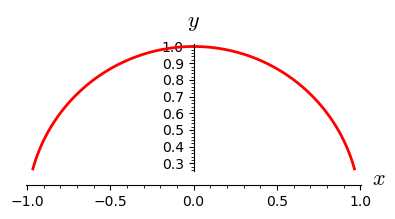

In [15]:
M = Manifold(2,'M',structure='Riemannian') # Riemannian manifold M
X.<x,y> = M.chart('x y:(0,+oo)')           # Poincare half-plane
g = M.metric()                             # metric on M
g[0,0], g[1,1] = 1/y^2, 1/y^2              # nonzero components of the metric
p = M((0,1), name='p')                     # point p
t = var('t')                               # symbolic variable for geodesic           
v = M.tangent_space(p)((1,0), name='v')    # tang. vect. at p, comp.: (1,0)
v1 = M.tangent_space(p)((-1,0), name='v1') # tang. vect. at p, comp.: (-1,0)
c = M.integrated_geodesic(g, (t, 0, 2), v, name='c')    # geodesic with init.vect. v
c1 = M.integrated_geodesic(g, (t, 0, 2), v1, name='c1') # geodesic with init.vect. v1
sol = c.solve()                            # find the geodesic facing right
interp = c.interpolate()                   # interpolate the result
p0=c.plot_integrated(thickness=2)          # plot the geodesic c
sol1=c1.solve()                            # find the geodesic facing left
interp1 = c1.interpolate()                 # interpolate the result
p1=c1.plot_integrated(thickness=2)         # plot the geodesic c1
(p0+p1).show(aspect_ratio=1,figsize=[4,4]) # combine plots

Now let us show how the other geodesigs through the same point may look.

First we repeat the six commands defining the Poincaré half-plane.

In [16]:
M = Manifold(2, 'M', structure='Riemannian')
X.<x,y> = M.chart('x y:(0,+oo)')
g = M.metric()
g[0,0], g[1,1] = 1/y^2, 1/y^2
p = M((0,1), name='p')
t = var('t')

Next we plot 6 geodesics facing right, 6 geodesics facing left,
one geodesic facing up and one geodesic pointing down.

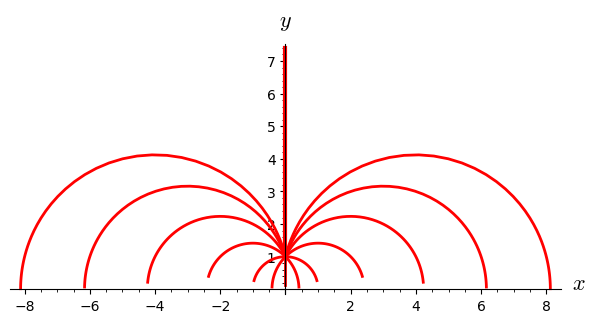

In [17]:
Gr=[]                                        # list of plots
                                             
for y in range(-1,5):                        # 6 geodesics pointing facing *right*
    v = M.tangent_space(p)((1,y),name='v')   # initial tangent vector
    c = M.integrated_geodesic(g,(t,0,2),v,name='c')   # define geodesic
    sol = c.solve()                          # find the geodesic points
    interp = c.interpolate()                 # interpolte the result
    gr=c.plot_integrated(thickness=2)        # plot thegeodesic
    Gr=Gr+[gr]                               # add the plot to the list of plots
    
for y in range(-1,5):                        # 6 geodesics pointing facing *left*
    v = M.tangent_space(p)((-1,y), name='v')        
    c = M.integrated_geodesic(g,(t,0,2),v,name='c')   # comments as above
    sol = c.solve()
    interp = c.interpolate()
    gr=c.plot_integrated(thickness=2) 
    Gr=Gr+[gr]
                                             # vertical geodesic facing up                                
v = M.tangent_space(p)((0,1), name='v')             
c = M.integrated_geodesic(g,(t,0,2),v,name='c')      # coments as above
sol = c.solve()
interp = c.interpolate()
gr=c.plot_integrated(thickness=3) 
Gr=Gr+[gr]
                                             # vertical geodesic pointing down
v = M.tangent_space(p)((0,-1), name='v')             
c = M.integrated_geodesic(g,(t,0,2),v,name='c')      # coments as above
sol = c.solve()
interp = c.interpolate()
gr=c.plot_integrated(thickness=2) 
Gr=Gr+[gr]

sum(Gr).show(aspect_ratio=1)                 # combine all plots

As we can see (one can suspect that) geodesics in Poincare half-plane are semicircles or vertical half-lines.

<br><br>
**Example 22.8**

Show (numerically) that one of the geodesics on the sphere $S^2$ is the "equator".

In [18]:
N = Manifold(2, 'N')         # manifold N=S^2
c_sph.<theta,phi>=N.chart()  # spherical coordinates
g=N.metric('g')              # metric on S^2
g[0,0],g[1,1]=1,sin(theta)^2 # components of g
p = N((pi/2,pi), name='p')   # initial point on S^2
t = var('t')                 # symbolic variable for geodesic
v = N.tangent_space(p)((0,1), name='v') # tang.vector at p
                             # define geodesic
c = N.integrated_geodesic(g, (t, 0, 2*pi), v, name='c')
sol = c.solve()              # find the geodesic points
interp = c.interpolate()     # interpolate the result

The geodesic is computed, but to show a 3-dimensional picture
we need the embedding $ \psi: S^2\to R^3$.

In [19]:
M = Manifold(3, 'R^3')       # manifold M=R^3
c_xyz.<x,y,z> = M.chart()    # Cartesian coordinates
psi = N.diff_map(M, (sin(theta)*cos(phi), 
    sin(theta)*sin(phi),cos(theta)),
    name='psi',latex_name=r'\psi') # embedding s^2 -> R^3
                             # plot the geodesic:
p1=c.plot_integrated(c_xyz,mapping=psi,thickness=3,color='red',
    plot_points=200, aspect_ratio=1,label_axes=False)
p2=sphere(color='lightgrey',opacity=0.6)  # plot sphere
(p1+p2).show(frame=False)    # combine plots

Graphics3d Object

## What's next?

Take a look at the notebook [Curvature](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/23Manifold_Curvature.ipynb).